In [5]:
import pymongo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client["dadosVivamente"]
collection = db["postsComPerguntasComInfos"]

In [7]:
# Filtrando documentos com o atributo nivel maior ou igual a 2
filtro = {"nivel": {"$gte": 2}}
documentos = collection.find(filtro)

In [8]:
# Transformando os documentos em um DataFrame
df = pd.DataFrame(list(documentos))

In [9]:
df.head()

,_id,idade,sexo,id_usuario,nivel,pessimismo,tristeza,fracasso,prazer,culpa,...,postCreated_time,postId,postObjectId,diaDaSemana,hora,minutos,diaDoMes,mes,ano,postStory
0,5924482d83c0c8001d749b3e,27,F,10206867589326568,2.0,2,3,3,2,1,...,2017-05-19 23:30:59,10206867589326568_10206845377651290,5924482d83c0c8001d749b3e,Sexta-feira,23,30,19,5,2017,NaN
1,5924482d83c0c8001d749b3f,27,F,10206867589326568,2.0,2,3,3,2,1,...,2017-05-13 14:30:15,1439530366107738_1430785120315596,5924482d83c0c8001d749b3f,Sábado,14,30,13,5,2017,NaN
2,5924482d83c0c8001d749b40,27,F,10206867589326568,2.0,2,3,3,2,1,...,2017-05-13 12:49:29,10206867589326568_10206803446003025,5924482d83c0c8001d749b40,Sábado,12,49,13,5,2017,NaN
3,5924482d83c0c8001d749b41,27,F,10206867589326568,2.0,2,3,3,2,1,...,2017-04-30 20:31:52,10206867589326568_10206721652718244,5924482d83c0c8001d749b41,Domingo,20,31,30,4,2017,Taiane Ramos shared CNN's photo.
4,5924482d83c0c8001d749b42,27,F,10206867589326568,2.0,2,3,3,2,1,...,2017-04-28 20:05:14,10155135195386675_10155060689106675,5924482d83c0c8001d749b42,Sexta-feira,20,5,28,4,2017,Paula Amato shared a memory — with Keylla Ramo...


In [10]:
df['postCreated_time'] = pd.to_datetime(df['postCreated_time'])
df = df.sort_values(by='postCreated_time')

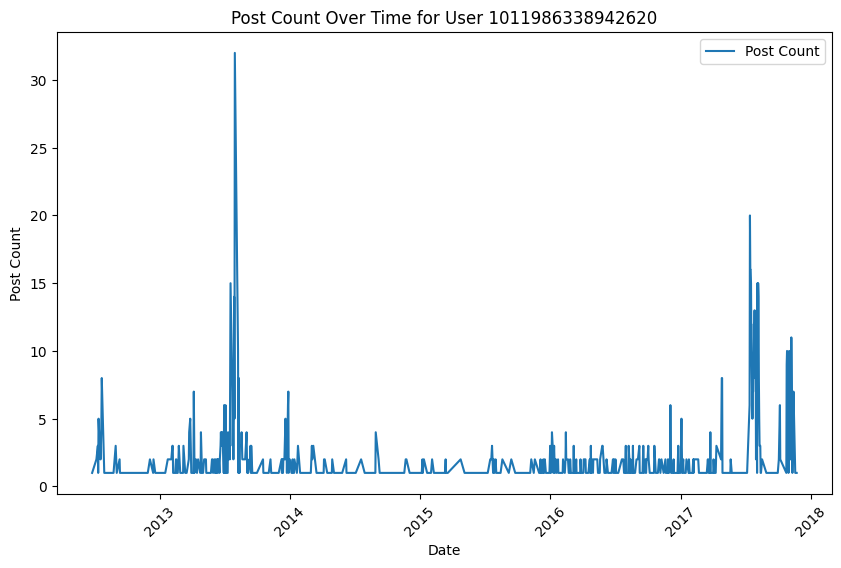

/tmp/ipykernel_13499/872876568.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usuario['moving_average'] = df_usuario['post_count'].rolling(window=window_size).mean()


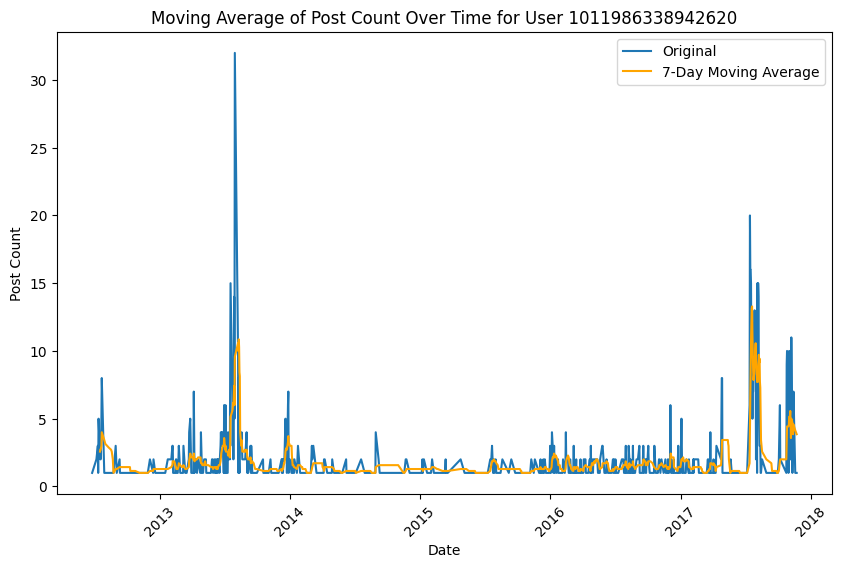

/tmp/ipykernel_13499/872876568.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usuario['exponential_smoothing'] = df_usuario['post_count'].ewm(alpha=alpha).mean()


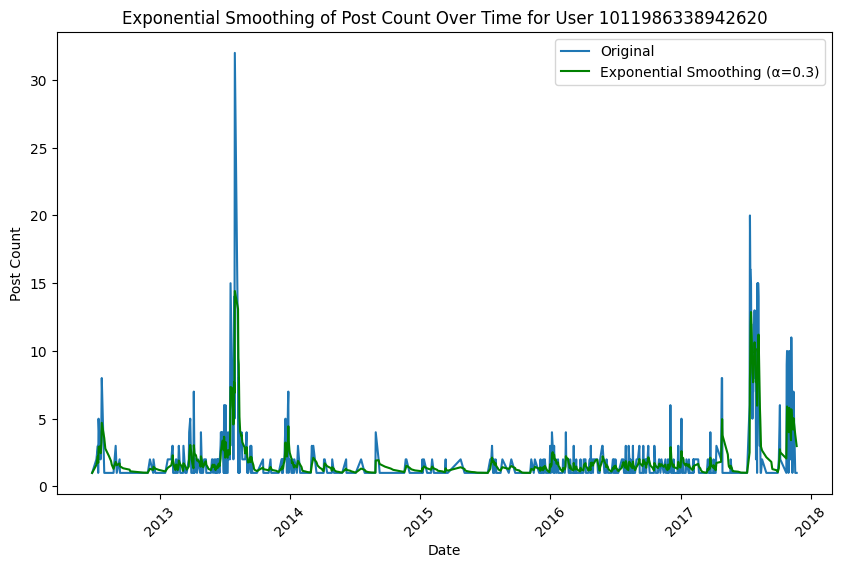

In [11]:
df['date'] = df['postCreated_time'].dt.date
df_grouped = df.groupby(['id_usuario', 'date']).size().reset_index(name='post_count')

# Escolha um usuário específico para visualizar os dados, ou faça a análise em todos os usuários
usuario_id = df_grouped['id_usuario'].iloc[0]  # aqui pegamos o primeiro usuário como exemplo
df_usuario = df_grouped[df_grouped['id_usuario'] == usuario_id]

# Exibindo a série temporal de contagem de postagens
plt.figure(figsize=(10, 6))
plt.plot(df_usuario['date'], df_usuario['post_count'], label='Post Count')
plt.title(f'Post Count Over Time for User {usuario_id}')
plt.xlabel('Date')
plt.ylabel('Post Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Implementando Média Móvel (Moving Average)
window_size = 7  # por exemplo, uma janela de 7 dias
df_usuario['moving_average'] = df_usuario['post_count'].rolling(window=window_size).mean()

# Plotando Média Móvel
plt.figure(figsize=(10, 6))
plt.plot(df_usuario['date'], df_usuario['post_count'], label='Original')
plt.plot(df_usuario['date'], df_usuario['moving_average'], label=f'{window_size}-Day Moving Average', color='orange')
plt.title(f'Moving Average of Post Count Over Time for User {usuario_id}')
plt.xlabel('Date')
plt.ylabel('Post Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Implementando Suavização Exponencial (Exponential Smoothing)
alpha = 0.3  # taxa de suavização
df_usuario['exponential_smoothing'] = df_usuario['post_count'].ewm(alpha=alpha).mean()

# Plotando Suavização Exponencial
plt.figure(figsize=(10, 6))
plt.plot(df_usuario['date'], df_usuario['post_count'], label='Original')
plt.plot(df_usuario['date'], df_usuario['exponential_smoothing'], label=f'Exponential Smoothing (α={alpha})', color='green')
plt.title(f'Exponential Smoothing of Post Count Over Time for User {usuario_id}')
plt.xlabel('Date')
plt.ylabel('Post Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()